In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import det,inv
from math import sqrt,pi
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from scipy.stats import multivariate_normal


def ldaLearn(X,y):
    '''
      Inputs
         X - a N x d matrix with each row corresponding to a training example
         y - a N x 1 column vector indicating the labels for each training example
    
      Outputs
        means - A d x k matrix containing learnt means for each of the k classes
        covmat - A single d x d learnt covariance matrix 
    '''
   
    labels = np.unique(y)
  
    total_label   = labels.shape[0]
    total_feature = X.shape[1]
    
    means  = np.zeros([total_label,total_feature])

    r = 0
    for i in labels:
        data = X[np.where(y == i)[0],]
        #print(data)
        m = np.mean(data,axis=0)
        means[r,] = m
        r +=1
    
    X_transpose = np.transpose(X)
    
    covmat = np.cov(X_transpose)
    return means,covmat

def ldaTest(means,covmat,Xtest,ytest):
    # Inputs
    # means, covmat - parameters of the LDA model
    # Xtest - a N x d matrix with each row corresponding to a test example
    # ytest - a N x 1 column vector indicating the labels for each test example
    # Outputs
    # acc - A scalar accuracy value
    # ypred - N x 1 column vector indicating the predicted labels
    
    # IMPLEMENT THIS METHOD
    r = Xtest.shape[0]
    c = means.shape[0]
    res = np.zeros((r,c))
    f = 1/np.sqrt((2*pi)**means.shape[1]*det(covmat))
    for j in range(means.shape[0]):
        res[:,j] = f * np.exp(-0.5*np.array([np.dot(np.dot((Xtest[i,:] - means[j,:]),inv(covmat)),np.transpose(Xtest[i,:] - means[j,:])) for i in range(Xtest.shape[0])]))

    ypred = np.argmax(res,axis=1) 
    res = (ypred - ytest.ravel())
    acc = np.count_nonzero(res==0)   
    return float(acc)/len(ytest),ypred

[[36.25714286 19.1       ]
 [15.74285714 34.52857143]] 
 [[216.41726619 -14.86330935]
 [-14.86330935 220.23864337]]
Accuracy 0.95


array([1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

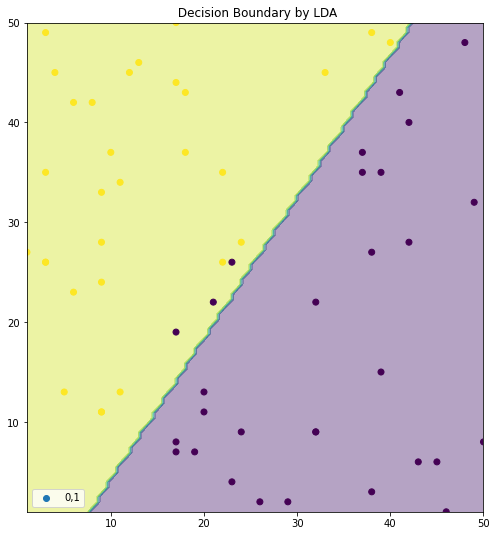

In [3]:
data = pd.read_excel('data1.xlsx')
data1=data['Unnamed: 2'].replace(to_replace=-1 , value=0)
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]
Y=np.array(Y)
X =np.array(X)

x_train,x_test,y_train,y_test = train_test_split(X,data1,test_size=0.3,random_state=1)
means,covmat = ldaLearn(x_train,y_train)
print(means,'\n',covmat)
x_train .shape[0]
acc,res = ldaTest(means,covmat,x_test,y_test)
print('Accuracy',acc)

# Decision Boundary
x1 = np.linspace(X[:,0].min(),X[:,].max(),100)
x2 = np.linspace(X[:,1].min(),X[:,1].max(),100)
xx1,xx2 = np.meshgrid(x1,x2)
xx = np.zeros((x1.shape[0]*x2.shape[0],2))
xx[:,0] = xx1.ravel()
xx[:,1] = xx2.ravel()

fig = plt.figure(figsize=[18,9])
plt.subplot(1, 2, 1)

zacc,zldares = ldaTest(means,covmat,xx,np.zeros((xx.shape[0],1)))
plt.contourf(x1,x2,zldares.reshape((x1.shape[0],x2.shape[0])),alpha=0.4)
plt.scatter(x_test[:,0],x_test[:,1],c=y_test,label="0,1")
plt.title(' Decision Boundary by LDA')
plt.legend()

res

In [10]:
plt.style.use('seaborn-dark')
#plt.rcParams[figure.figsize]=14,6
fig = plt.figure()
for i, j in enumerate(covmat):
    dis = multivariate_normal(cov = covmat,mean=means)
    


    sig_1,sig_2 = covmat[0,0],covmat[1,1]

    x_p = np.linspace(-3*sig_1 , 3*sig_1 ,100)
    y_p = np.linspace(-3*sig_2 , 3*sig_2 ,100)
    x,y = np.meshgrid(x_p,y_p)
    pdf = np.zeros(x.shape)
    for k in range(x.shape[0]):
        for l in range(x.shape[1]):
            pdf[k,l] = dis.pdf([x[k,l],y[k,l]])
    key = 131+ i
    ax = fig.add_subplot(key,projection='3d')
    ax.plot_surface(x,y,pdf,cmap='viridis')
plt.show()

ValueError: Array 'mean' must be a vector of length 4.

<Figure size 432x288 with 0 Axes>

ValueError: shapes (100,100,2) and (1,1) not aligned: 2 (dim 2) != 1 (dim 0)

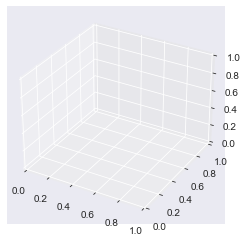

In [44]:
#dis = multivariate_normal(cov = covmat[0,0],mean=means[0,0])
sig_1,sig_2 = covmat[0,0],covmat[1,1]

x_p = np.linspace(-3*sig_1 , 3*sig_1 ,100)
y_p = np.linspace(-3*sig_2 , 3*sig_2 ,100)
x,y = np.meshgrid(x_p,y_p)

df = np.empty(x.shape+(2,))
df[:,:,0]=x
df[:,:,1] = y

dis = multivariate_normal(cov = covmat[0,0],mean=means[0,0])
fig = plt.figure()
ax=fig.gca(projection ='3d')
ax.plot_surface(x,y,dis.pdf(df),cmap='viridis')
plt.show()

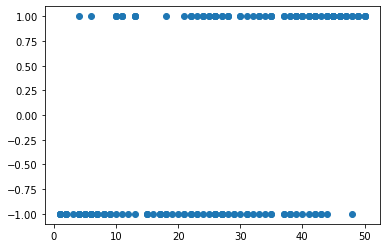

In [22]:
plt.scatter(X[:,1],Y)

In [10]:
from sklearn import preprocessing
scaled = 

In [33]:
data2 = pd.read_csv('data2.csv',header=None)
Y2= data2.iloc[:,-1]
Y2=Y2.replace(to_replace =-1,value=0)
X2 =data2.iloc[:,:-1]
x2 =np.array(X2)

x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,Y2,test_size=0.3,random_state=1)
means2,covmat2 = ldaLearn(x_train2,y_train2)
print(means2,'\n',covmat2)
#x_train .shape[0]
acc2,res2 = ldaTest(means2,covmat2,x_test2,y_test2)
print('Accuracy',acc2)

[[45.08571429 70.4        44.        ]
 [59.44285714 23.35714286 59.68571429]] 
 [[934.49799589 -78.37774923 -52.14522097]
 [-78.37774923 886.33766701 -50.95447071]
 [-52.14522097 -50.95447071 756.69455293]]
Accuracy 0.9833333333333333


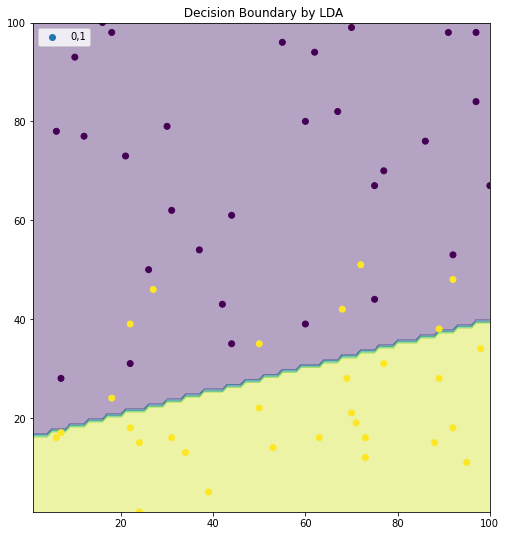

In [40]:
x1_n = np.linspace(1,100,100)
x2_n = np.linspace(1,100,100)
xx1_n,xx2_n = np.meshgrid(x1_n,x2_n)
xx_n = np.zeros((x1_n.shape[0]*x2_n.shape[0],3))
xx_n[:,0] = xx1_n.ravel()
xx_n[:,1] = xx2_n.ravel()

fig = plt.figure(figsize=[18,9])
plt.subplot(1, 2, 1)

zacc2,zldares2 = ldaTest(means2,covmat2,xx_n,np.zeros((xx_n.shape[0],1)))
plt.contourf(x1_n,x2_n,zldares2.reshape((x1_n.shape[0],x2_n.shape[0])),alpha=0.4)
plt.scatter(x_test2[:,0],x_test2[:,1],c=y_test2,label="0,1")
plt.title(' Decision Boundary by LDA')
plt.legend()

In [39]:
zacc2,zldares2 = ldaTest(means2,covmat2,xx_n,np.zeros((2,1)))

ValueError: operands could not be broadcast together with shapes (2,) (3,) 

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Thu Feb  6 11:10:27 2020

@author: Adil
"""

# The Linear Discriminant Analysis from scratch

# The required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

# Import the data

columns = ["var","skewness","curtosis","entropy","class"]
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt",index_col=False, names = columns)

# Checking the data 

#f, ax = plt.subplots(1, 4, figsize=(10,3))
#vis1 = sns.distplot(df["var"],bins=10, ax= ax[0])
#vis2 = sns.distplot(df["skewness"],bins=10, ax=ax[1])
#vis3 = sns.distplot(df["curtosis"],bins=10, ax= ax[2])
#vis4 = sns.distplot(df["entropy"],bins=10, ax=ax[3])
#f.savefig('subplot.png')

#sns.pairplot(df, hue="class")

def My_LDA(X):
    
    # Data preprocessing
    n=X.shape[0]
    p=X.shape[1]
    
    Features=X[:,:p]
    classVector=X["class"]
    class1index=classVector=="class1"
    class2index=classVector=="class2"
    Class1=X[class1index,:]
    Class2=X[class2index,:]
    
    n1=Class1.shape[0]
    n2=Class2.shape[0]

    
    # Compute d-dimensional mean vectors for different classes
    m1=np.mean(Class1,axis=0)
    m2=np.mean(Class2,axis=0)
    m=np.mean(Features,axis=0)
    
    # Compute in-between class and with-in class scatter matrices
   
    B=np.dot((m1-m),(m1-m).T)*n1 +np.dot((m2-m),(m2-m).T)*n2
    B=B/n
    
    W1=np.cov(Class1)*(n1-1)/n1    
    W2=np.cov(Class2)*(n2-1)/n2   
  
    W=n1*W1+n2*W2
    W=W/n
    
    
    # Compute eigen values and correspanding eigen vectors for the scatter matrices
    
    lmd, Vect = np.linalg.eig(np.linalg.inv(W).dot(B))
    indices=np.argsort(lmd)[::-1]
    Vect=Vect[:,indices]
    
    
    # Transform the feature space
    X_lda = X.dot(Vect)
    
    return X_lda
   
    
    
    
    
    
    
    


    

In [32]:
X[:,1].max()

50

[[36.25714286 19.1       ]
 [15.74285714 34.52857143]] 
 [[216.41726619 -14.86330935]
 [-14.86330935 220.23864337]]
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
57


(0.95,
 array([1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
        1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
        1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0], dtype=int64))

[ 1  1  1 -1 -1 -1  1  1  1 -1 -1  1  1  1 -1 -1 -1  1 -1  1  1  1  1  1
  1 -1  1  1 -1  1  1 -1 -1 -1 -1  1 -1  1  1 -1 -1 -1 -1  1  1  1 -1  1
 -1 -1  1 -1 -1  1  1 -1 -1 -1 -1 -1]


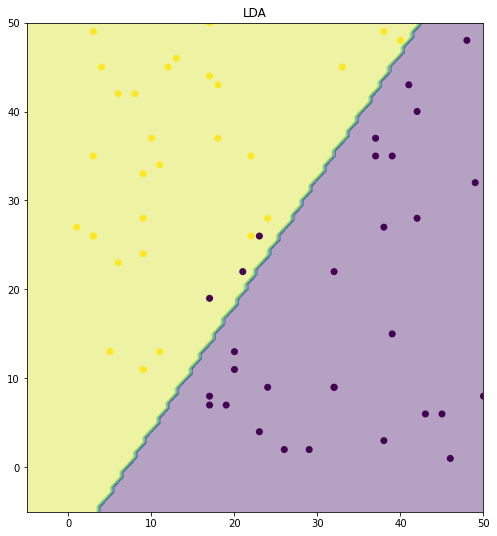

In [25]:
def ldaTest(means,covmat,Xtest,ytest):
    # Inputs
    # means, covmat - parameters of the LDA model
    # Xtest - a N x d matrix with each row corresponding to a test example
    # ytest - a N x 1 column vector indicating the labels for each test example
    # Outputs
    # acc - A scalar accuracy value
    # ypred - N x 1 column vector indicating the predicted labels
    
    # IMPLEMENT THIS METHOD
    r = Xtest.shape[0]
    c = means.shape[0]
    res = np.zeros((r,c))
    f = 1/np.sqrt((2*pi)**means.shape[1]*det(covmat))
    for j in range(means.shape[0]):
        for i in range(Xtest.shape[0]):
            res[:,j] = f * np.exp(-0.5*np.array([np.dot(np.dot((Xtest[i,:] - means[j,:]),inv(covmat)),np.transpose(Xtest[i,:] - means[j,:]))]) 
            ypred = np.argmax(res,axis=1)
            
            res = (ypred - ytest.ravel())
            acc_data = np.where(res)[0]
            acc = len(acc_data)
    return float(acc)/len(ytest),ypred

SyntaxError: invalid syntax (<ipython-input-25-4ff5b0d66b7f>, line 18)

In [91]:
def ldatest(means,covmat,x_test,y_test):
    r = x_test.shape[0]
    c=means.shape[0]
    res = np.zeros((r,c))
    f = 1/np.sqrt((2*pi)**means.shape[1]*det(covmat))
    for j,i in range(means.shape[0]),range(x_test.shape[0]):
       
        res[:,j] = np.array[f*np.exp(-0.5*(np.dot(np.dot((x_test[i,:]-means[j,:]),inv(covmat),np.transpose(x_test[i,:]-means[j,:])))))]
        ypred = np.argmax(res,axis=1)+1
        res =(ypred == y_test.ravel())
        acc=np.where(res)[0]
        a= len(acc)
    return float(a)/len(y_test),ypred

In [59]:
def ldatest1(means,covmat,x_test,y_test):
    r = x_test.shape[0]
    c=means.shape[0]
    res = np.zeros((r,c))
    f = 1/np.sqrt((2*pi)**means.shape[1]*det(covmat))
    for j in range(means.shape[0]):
        for i in range(x_test.shape[0]):
            dd =np.dot((x_test[i,:]-means[j,:]),inv(covmat)
            res[:,j] = np.array[f*np.exp(-0.5*(np.dot(dd,np.transpose(x_test[i,:]-means[j,:]))))]
        ypred = np.argmax(res,axis=1)+1
        res =(ypred == y_test.ravel())
        acc=np.where(res)[0]
        a= len(acc)
    return float(a)/len(y_test),ypred

NameError: name 'res' is not defined

In [5]:
from PIL import Image,ImageFont, ImageDraw

im = Image.open("IIST_logo.png")
im.show()